<a href="https://colab.research.google.com/github/MattiaPOLI/DR14/blob/nico/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ~-----enable Colab to load CSV-----
# import useful libraries
from google.colab import files

# specify the file to load
uploaded = files.upload()

Saving Sky.csv to Sky.csv


In [48]:
# ~-----import libraries-----
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# ~-----load desired data-----
# store data in a Pandas dataframe
df = pd.read_csv(io.StringIO(uploaded['Sky.csv'].decode('utf-8')), sep=',', header=0)


# ~-----data cleaning-----
# drop the following useless features:
#   - objid, specobjid: numerical ID of the celestial body
#   - run, rerun, camcol, field: parameters used to identify from which scan data are taken
#   - plate, mjd, fiberid: parameters related to the used laboratory equipment
df_cleaned = df.drop( columns=['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'plate', 'mjd', 'fiberid'] )

# remove missing values
df_cleaned = df_cleaned.dropna()


# ~-----retrieve predictors and response variables-----
# get predictors
X = df_cleaned

# extract class label from the dataframe
y = X.pop('class')

# determine available classes
classes = np.unique(y.values).tolist()
class_code = {classes[k]: k for k in range(3)}
y_colors = [class_code[cl] for cl in y]


# ~-----normalize data-----
# create standard scaler object
scaler = StandardScaler().fit(X)

# normalize predictors
X_norm = scaler.transform(X)


# ~-----PCA-----
# create PCA object
pca = PCA().fit(X_norm)

# find new space
X_pca = pca.transform(X_norm)

# exploit most expressive PCs (first 5)
X_ready = X_pca[:, 0:5]


# ~-----visualize results-----
print (class_code)

print ('X= ' + str(X_ready.shape))
print ('y= ' + str(y.shape))

X_ready.view()

{'GALAXY': 0, 'QSO': 1, 'STAR': 2}
X= (10000, 5)
y= (10000,)


array([[-1.15239766, -0.66539039, -0.33234926, -0.67354267, -1.36838363],
       [-0.28088579, -0.58065913, -0.31886281, -0.1621427 ,  0.07913557],
       [ 1.30200395, -0.71285814, -0.29406976, -0.40156115, -0.374463  ],
       ...,
       [ 1.19407769,  0.95603664,  1.27248572, -0.70834838,  0.71192935],
       [ 1.19456035,  0.94259761,  1.27511444, -0.78434171,  0.45373058],
       [-0.56639967,  1.04184989,  1.24786673, -0.83216437, -1.10842779]])

In [0]:
# ~-----import libraries-----
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


# ~-----create training and testing sets-----
X_train, X_test, y_train, y_test = train_test_split(X_ready, y, test_size=0.3, random_state=42)


# ~-----generally valid variables-----
C_range = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000])
gamma_range = np.array([1e-9, 1e-7, 1e-5, 1e-3])

======= Linear SVM =======
C=0.001   	--> 77.32%
C=0.01   	--> 85.34%
C=0.1   	--> 95.20%
C=1.0   	--> 97.83%
C=10.0   	--> 98.26%
C=100.0   	--> 98.29%
C=1000.0   	--> 98.33%

Best C=   	1000.0
Test accuracy= 	98.20%


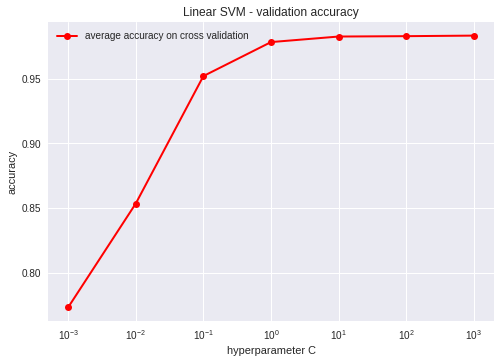

In [102]:
# ~-----linear SVM-----
# auxiliary variables
accuracy_validation = []
score_max = 0
C_best_linear = 0

# optimizes parameters
print("======= Linear SVM =======")
for C in C_range:
    model = svm.SVC(kernel='linear', C=C)
    scores = cross_val_score(model, X_train, y_train, cv=10)
    avg = np.mean(scores)
    accuracy_validation.append(avg)
    print("C=" + str(C) + "   \t--> %.2f%%" % (avg*100))
    if (avg > score_max):
        score_max = avg
        C_best_linear = C
            
print("\nBest C=   \t" + str(C_best_linear))


# ~-----create best SVM-----
# train model
svc_linear = svm.SVC(kernel='linear', C=C_best_linear)
svc_linear.fit(X_train, y_train)

# evaluate classificator on testing set
accuracy = svc_linear.score(X_test, y_test)

print("Test accuracy= \t%.2f%%" % (accuracy*100))


# ~-----visualize results-----
fig = plt.figure()
ax = fig.gca()
plt.plot(C_range, accuracy_validation, 'ro-', linewidth=2, label='average accuracy on cross validation')
plt.xscale("log")
plt.title('Linear SVM - validation accuracy')
plt.xlabel('hyperparameter C')
plt.ylabel('accuracy')
ax.legend()

plt.show()